# Assignment 2: Classification and Evaluation (20 marks)

Student Name: `Hugo Akindele-Obe`

Student ID: `1444970`

## General info

<b>Due date</b>: *5 pm on Friday 7th of April*

<b>Submission method</b>: Canvas submission

<b>Submission materials</b>: completed copy of this iPython notebook

<b>Late submissions</b>: -10% per day up to 5 days (both weekdays and weekends count)
<ul>
    <li>one day late, -2;</li>
    <li>two days late, -4;</li>
    <li>three days late, -6;</li>
    <li>four days late, -8;</li>
    <li>five days late, -10;</li>
</ul>

<b>Marks</b>: This assignment will be marked out of 20, and make up 20% of your overall mark for this subject.

<b>Materials</b>: See [Using Jupyter Notebook and Python page] on Canvas (under Modules> Coding Resources) for information on the basic setup required for this class, including an iPython notebook viewer and the python packages `numpy`, `pandas`, `matplotlib` and `sklearn`. You can use any Python built-in packages, but do not use any other 3rd party packages; if your iPython notebook doesn't run on the marker's machine, you will lose marks. <b> You should use Python 3</b>.  

<b>Evaluation</b>: Your iPython notebook should run end-to-end without any errors in a reasonable amount of time, and you must follow all instructions provided below, including specific implementation requirements and instructions for what needs to be printed (please avoid printing output we don't ask for). You should edit the sections below where requested, but leave the rest of the code as is. You should leave the output from running your code in the iPython notebook you submit, to assist with marking. The amount each section is worth is given in parenthesis after the instructions. 


<b>Updates</b>: Any major changes to the assignment will be announced via Canvas. Minor changes and clarifications will be announced on Canvas>Assignments>Assignmnet1; we recommend you check it regularly.

<b>Academic misconduct</b>: This assignment is an individual task, and so reuse of code or other instances of clear influence will be considered cheating. Please check the <a href="https://canvas.lms.unimelb.edu.au/courses/124196/modules#module_662096">CIS Academic Honesty training</a> for more information. We will be checking submissions for originality and will invoke the University’s <a href="http://academichonesty.unimelb.edu.au/policy.html">Academic Misconduct policy</a> where collusion or plagiarism are deemed to have taken place. Content produced by an AI (including, but not limited to ChatGPT) is not your own work, and submitting such content will be treated as a case of academic misconduct, in line with the <a href="https://academicintegrity.unimelb.edu.au/plagiarism-and-collusion/artificial-intelligence-tools-and-technologies"> University's policy</a>.

**IMPORTANT**

Please carefully read and fill out the <b>Authorship Declaration</b> form at the bottom of the page. Failure to fill out this form results in the following deductions: 
<UL TYPE=”square”>
<LI>Missing Authorship Declaration at the bottom of the page, -2.0
<LI>Incomplete or unsigned Authorship Declaration at the bottom of the page, -1.0
</UL>


## Overview:
For this assignment, you will work with a provided dataset to train and utilize multiple classifiers to analyze different versions of the dataset. In addition to implementing these classifiers, you will also explore various evaluation paradigms and analyze the impact of multiple parameters on the performance of the classifiers. Finally, you will be expected to answer some conceptual questions based on your observations and analysis.

## Data Set:
In this assignment, you will work with multiple versions of one dataset called "Amphibians." It is adopted from a famous public dataset, and you can find more details about it <a href= "https://archive.ics.uci.edu/ml/datasets/Amphibians#"> here </a>.  The dataset includes information about five groups of amphibians in Poland: "Green frogs," "Brown frogs," "Common toad," "Tree frog," and "Fire-bellied toad." The dataset comprises 14 attributes and one class. Some of these attributes are numeric, some are categorical, and some are ordinal.

You can find details about all the features in the dataset in the file "README.txt".

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler

In [36]:
import warnings

# ignore future warnings 
warnings.simplefilter(action='ignore', category=FutureWarning)

## Question 1 [5 marks]
**Q1.1 A.** Read the dataset "amphibians1.csv" dataset into a pandas DataFrame called `data1`. Create a function called `encode` that takes in the features of the dataset as a pandas DataFrame and uses one-hot encoding to convert all nominal (and ordinal) attributes to numeric. You can achieve this by either using `get_dummies()` from the pandas library or `OneHotEncoder()` from the scikit-learn library. **[1 mark]**

**B.** For 10 rounds, use `train_test_split` to divide the encoded `data1` into 70% train, 30% test . Set the `random_state` equal to the loop counter. For example in the loop
``` python 
for i in range(10):
```
make `random_state` equal to `i`. 
Use the splitted datasets to train and test the following models (use the default hyperparameters): **[1 mark]**
- Zero-R
- Gaussian Naive Bayes
- Multinomial Naive Bayes
- Bernoulli Naive Bayes model

Report the average accuracy over the 10 runs.

In [37]:
data1 = pd.read_csv("amphibians1.csv")

y1 = data1.iloc[:, -1] # labels
X1 = data1.iloc[:, :-1] # instances

# print(y1.value_counts())

In [38]:
# preprocessing 
def encode(df):

    # List of categorical / ordinal attributes
    nominal_atts = ['TR', 'VR', 'SUR1', 'SUR2', 'SUR3', 'UR', 'FR', 'RR', 'BR', 'MR', 'CR']
    # one hot encode only the categorical / ordinal attributes
    df_encoded = pd.get_dummies(df, prefix=nominal_atts, prefix_sep='-', columns=nominal_atts)
       
    return df_encoded


In [39]:
ZeroR_Acc_1 = []
GNB_Acc_1 = []
MNB_Acc_1 = []
BNB_Acc_1 = []

ZeroR = DummyClassifier(strategy="most_frequent")
GNB = GaussianNB()
MNB = MultinomialNB()
BNB = BernoulliNB()

X1_enc = encode(X1)

# Check distribution of attributes
# X1_enc.hist(figsize=(20,50))

for i in range(10):
    X1_enc_train, X1_enc_test, y1_train, y1_test = train_test_split(X1_enc, y1, test_size=0.3, random_state=i)
    
    ZeroR.fit(X1_enc_train, y1_train)
    ZeroR_Acc_1.append(ZeroR.score(X1_enc_test, y1_test))
    
    GNB.fit(X1_enc_train, y1_train)
    GNB_Acc_1.append(GNB.score(X1_enc_test, y1_test))
    
    MNB.fit(X1_enc_train, y1_train)
    MNB_Acc_1.append(MNB.score(X1_enc_test, y1_test))
    
    BNB.fit(X1_enc_train, y1_train)
    BNB_Acc_1.append(BNB.score(X1_enc_test, y1_test))
    
    # check detailed performance for one round
#     if (i == 5):
#         print("\n\n ===========\n ZeroR FULL RESULTS\n===========")
#         ZeroR_predictions = ZeroR.predict(X1_enc_test)
#         print(classification_report(y1_test,ZeroR_predictions, zero_division=0))
        
#         print("\n\n ===========\n GNB FULL RESULTS\n===========")
#         gnb_predictions = GNB.predict(X1_enc_test)
#         print(classification_report(y1_test,gnb_predictions, zero_division=0))
        
#         print("\n\n ===========\n MNB FULL RESULTS\n===========")
#         mnb_predictions = MNB.predict(X1_enc_test)
#         print(classification_report(y1_test,mnb_predictions, zero_division=0))

#         print("\n\n ===========\n BNB FULL RESULTS\n===========")
#         bnb_predictions = BNB.predict(X1_enc_test)
#         print(classification_report(y1_test,bnb_predictions, zero_division=0))

    

print("Accuracy of ZeroR:", np.mean(ZeroR_Acc_1).round(2))
print("Accuracy of GNB:", np.mean(GNB_Acc_1).round(2))
print("Accuracy of MNB:", np.mean(MNB_Acc_1).round(2))
print("Accuracy of BNB:", np.mean(BNB_Acc_1).round(2))

# print(X1_enc)


Accuracy of ZeroR: 0.59
Accuracy of GNB: 0.4
Accuracy of MNB: 0.35
Accuracy of BNB: 0.63


**Q1.2** After comparing the performance of the different models on the classification task, please comment on any differences or lack of differences you observe between the models. **[3 marks]**</br>
*NOTE: You may need to compare other performance metrics of these models, such as precision and recall of each class label, to gain a better understanding of their performance. You can use the `classification_report` from `sklearn.metrics` for this matter and check the performance of the classifiers for one round.*

Performance of the models across the board was low, with only Bernoulli Naive Bayes barely outperforming the Zero-R baseline in accuracy. After one-hot encoding the categorical/ordinal features, 11/14 of them are binary which suits Bernoulli well.
The encoding has also marginally helped the Multinomial Naive Bayes, however it looks like these attributes are not represented well by a multinomial distribution (only one feature is *prima facie* well represented by a multinomial distribution: NR).

The Gaussian Naive Bayes model assumes that attributes are normally distributed, which is not a good match for the attributes that we have encoded. Additionally, by one hot encoding the ordinal features, we have removed their ordinal relationship from being featured automatically, though it is not clear how significant the ordering is. The remaining numerically valued attributes are also not great fits for the normal distribution and feature several large outliers, which would influence the variance of the attributes for those classes and sway the GNB predictions.

Each Naive Bayes model showed a decent precision score when predicting the class label `Green frog`. This is because this label makes up the majority of the dataset, so the models are able to fit themselves better for predicting it. However, recall for this label, while higher than the other labels, was still low.

None of the models were successful at predicting the labels represented least in the dataset: 'Common toad', 'Fire-bellied toad', and 'Tree frog' which each have less than 10 instances in the whole `data1` set.

## Question 2 [5 marks]

**Q2.1.** Divide the `data1` into 70% train and 30% test splits for 10 rounds, set the `random_state` equal to the loop counter. Then, train and test **K-Nearest Neighbor algorithms (with K values of 1, 5, and 20)**, using Euclidean distance as the distance metric and maximum vote (no weighting) to determine the label. Finally, report the average accuracy of the KNN models over the 10 runs. **[1 mark]**

In [40]:
KNN1_Acc_1 = []
KNN5_Acc_1 = []
KNN20_Acc_1 = []

KNN1 = KNeighborsClassifier(n_neighbors=1)
KNN5 = KNeighborsClassifier(n_neighbors=5)
KNN20 = KNeighborsClassifier(n_neighbors=20)

for i in range(10):
    X1_enc_train, X1_enc_test, y1_train, y1_test = train_test_split(X1_enc, y1, test_size=0.3, random_state=i)
    
    KNN1.fit(X1_enc_train, y1_train)
    KNN1_Acc_1.append(KNN1.score(X1_enc_test, y1_test))

    KNN5.fit(X1_enc_train, y1_train)
    KNN5_Acc_1.append(KNN5.score(X1_enc_test, y1_test))
    
    KNN20.fit(X1_enc_train, y1_train)
    KNN20_Acc_1.append(KNN20.score(X1_enc_test, y1_test))
    
#     if (i == 5):
#         print("\n\n ===========\n KNN1 FULL RESULTS\n===========")
#         KNN1_predictions = KNN1.predict(X1_enc_test)
#         print(classification_report(y1_test, KNN1_predictions, zero_division=0))
        
#         print("\n\n ===========\n KNN5 FULL RESULTS\n===========")
#         KNN5_predictions = KNN5.predict(X1_enc_test)
#         print(classification_report(y1_test, KNN5_predictions, zero_division=0))
        
#         print("\n\n ===========\n KNN20 FULL RESULTS\n===========")
#         KNN20_predictions = KNN20.predict(X1_enc_test)
#         print(classification_report(y1_test, KNN20_predictions, zero_division=0))

            
print("Accuracy of KNN(1):", np.mean(KNN1_Acc_1).round(2))
print("Accuracy of KNN(5):", np.mean(KNN5_Acc_1).round(2))
print("Accuracy of KNN(20):", np.mean(KNN20_Acc_1).round(2))


Accuracy of KNN(1): 0.56
Accuracy of KNN(5): 0.6
Accuracy of KNN(20): 0.61


**Q2.2.A.** Create a function called `normalise` that takes the features of the dataset as a pandas DataFrame and scales all numeric attributes to the range of 0-1. You can either use `MinMaxScaler` from the `sklearn.preprocessing` library or implement the normalization step yourself.
**B.** For 10 rounds divide the normalised "data1" into 70% train and 30% test splits using set the `random_state` equal to the loop counter, and run the KNN models (k=1,5 and 20). Report the average accuracy of your KNN models over these 10 runs. **[1 mark]**

In [41]:
# preprocessing 
def normalise(X):
    
    # List of numerical attributes
    numer_atts = ['SR', 'NR', 'OR']
    
    # Normalise the numerical attributes
    X_norm = X.copy()
    scaler = MinMaxScaler()
    X_norm[numer_atts] = scaler.fit_transform(X_norm[numer_atts])
    
    
    return X_norm

In [42]:
######################################## POSSIBLE SOLUTION #############################################

KNN1_Acc_2 = []
KNN5_Acc_2 = []
KNN20_Acc_2 = []

X1_enc_norm = normalise(X1_enc)

for i in range(10):
    X1_enc_norm_train, X1_enc_norm_test, y1_train, y1_test = train_test_split(X1_enc_norm, y1, test_size=0.3, random_state=i)
    
    KNN1.fit(X1_enc_norm_train, y1_train)
    KNN1_Acc_2.append(KNN1.score(X1_enc_norm_test, y1_test))

    KNN5.fit(X1_enc_norm_train, y1_train)
    KNN5_Acc_2.append(KNN5.score(X1_enc_norm_test, y1_test))
    
    KNN20.fit(X1_enc_norm_train, y1_train)
    KNN20_Acc_2.append(KNN20.score(X1_enc_norm_test, y1_test))
    
#     if (i == 7):
#         print("\n\n ===========\n KNN1 FULL RESULTS\n===========")
#         KNN1_predictions = KNN1.predict(X1_enc_norm_test)
#         print(classification_report(y1_test, KNN1_predictions, zero_division=0))
        
#         print("\n\n ===========\n KNN5 FULL RESULTS\n===========")
#         KNN5_predictions = KNN5.predict(X1_enc_norm_test)
#         print(classification_report(y1_test, KNN5_predictions, zero_division=0))
        
#         print("\n\n ===========\n KNN20 FULL RESULTS\n===========")
#         KNN20_predictions = KNN20.predict(X1_enc_norm_test)
#         print(classification_report(y1_test, KNN20_predictions, zero_division=0))

            
print("Accuracy of KNN(1):", np.mean(KNN1_Acc_2).round(2))
print("Accuracy of KNN(5):", np.mean(KNN5_Acc_2).round(2))
print("Accuracy of KNN(20):", np.mean(KNN20_Acc_2).round(2))



Accuracy of KNN(1): 0.54
Accuracy of KNN(5): 0.57
Accuracy of KNN(20): 0.64


**Q2.3** Compare the results of the KNN models (for each value of K) in Q2.1 and Q2.2, and discuss any differences you observe. Did the preprocessing step in Q2.2 improve the performance of the KNN models? Why or why not? **[3 marks]**

Normalising the numeric attributes resulted in a decrease in performance for the KNN(1) and KNN(5) models. This is surprising as one of the potential problems for KNN is that attributes with large value ranges can potentially dominate the distance measurement, overshadowing other attributes that might be more relevant to the classification. Normalisation gives all numeric attributes equal weight in determining the distance between instances, so we would expect an improvement in performace with the removal of this bias.

However, this is not the case here primarily due to the large number of binary attributes resulting from our previous one-hot encoding, and the presence of outliers in the numeric attributes. Due to the one-hot encoding, it looks like the binary attributes now dominate the distance measurement, while the numeric attributes are overshadowed. 
Additionally, there are some outliers in the numeric attributes (particularly 'SR') that skew the normalisation for these attributes, further lessening their weighting. In this case it seems likely that the numeric attributes are useful predictors, and their reduced weighting has had an adverse effect.

We do see an increase in performace for the KNN(20) model, which may be due to a few reasons. Looking at more neighbours would allow the numeric attributes that were overlooked in the k=1 and k=5 models to be considered again. Additionally, increasing k also lessens the effect of outliers and noise, and can allow better generalisations.

## Question 3 [5 marks]

**Q3.1.** Read the "amphibians2.csv" into `data2` and  "amphibians1.csv" into `data1_2`. Observe any differences in the values of the feature "SR" between these two datasets, and explain why you think these changes were made (provide your hypothesis). Use diagrams such a histograms or boxplots to check the distribution of the feature 'SR' before and after the change. **[2 marks]**

In [43]:
data2 = pd.read_csv("amphibians2.csv")
data1_2 = pd.read_csv("amphibians1.csv")

array([[<AxesSubplot:title={'center':'SR'}>]], dtype=object)

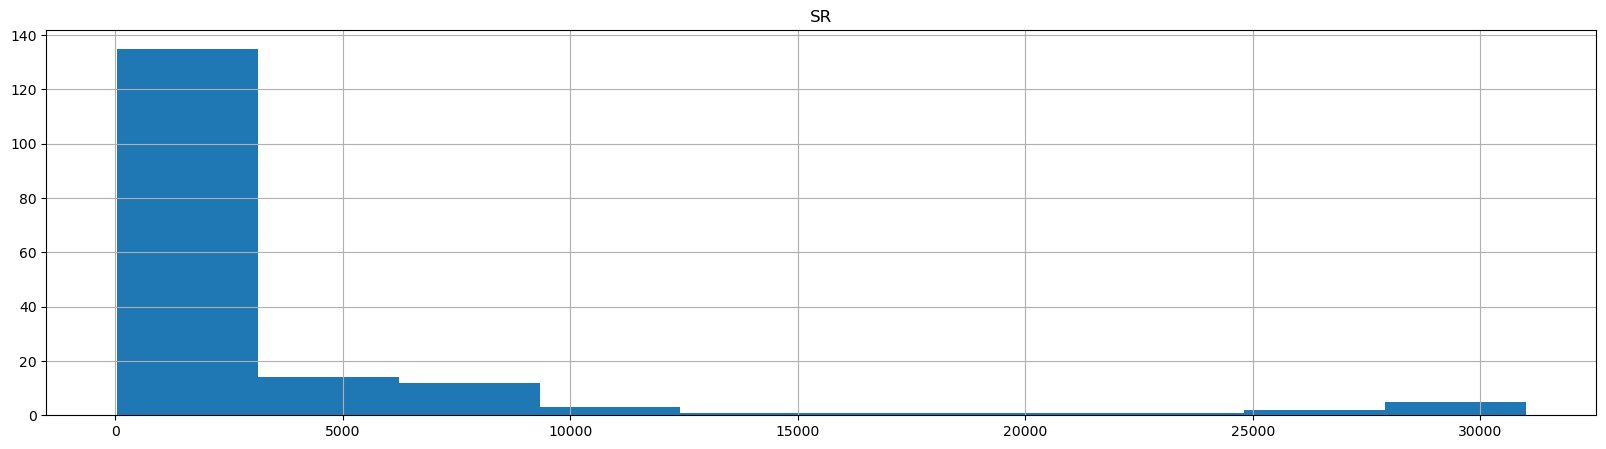

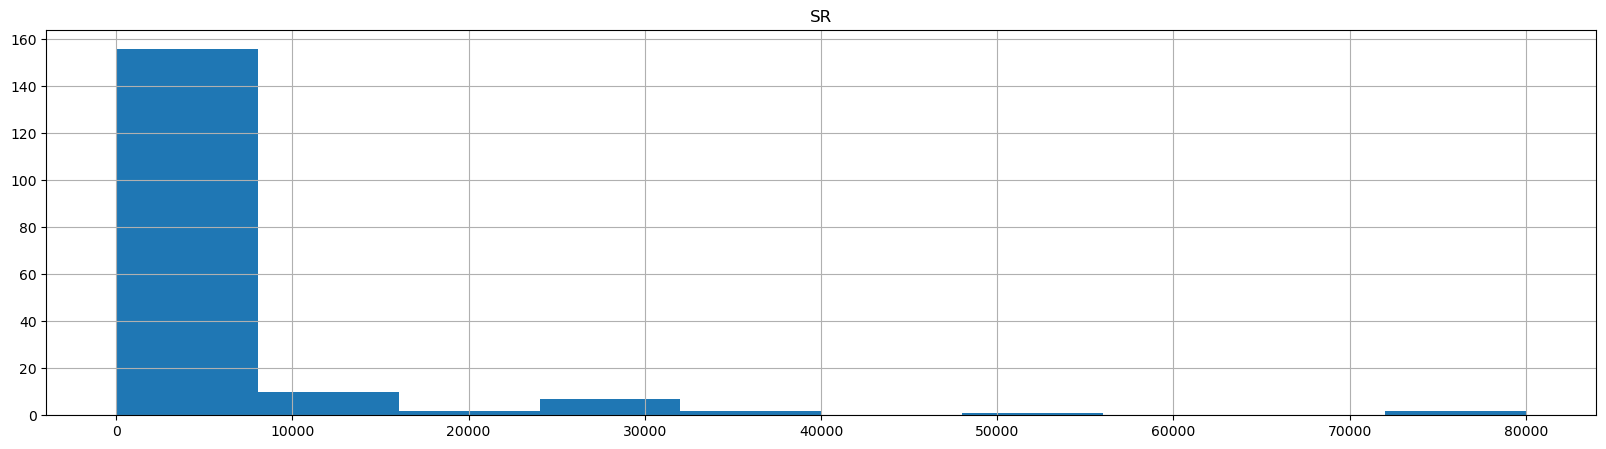

In [44]:
data2.hist(column='SR', figsize=(20,5))
data1_2.hist(column='SR', figsize=(20,5))

The data in "amphibians2.csv" is the same as "amhpibians1.csv" but with the top 5 'SR' outlier value instances removed. 
Outliers can have various adverse effects which may be contributing to the poor performance of the models above. For the GNB model, the outliers would be affecting the normal distribution assumed by increasing the variance. For KNN the outliers will increase the Euclidian distance results drastically, and after normalising will reduce the weight of all the other 'normal' values in distance calculation.

The greatest 5 values from the 'SR' attribute are likely removed here to prevent/reduce these effects, and should be effective for the models already mentioned. Other models, such as Bernoulli Naive Bayes and Decision Trees can be more robust to outliers by themselves, so might not benefit as much.

**Q3.2** 
For 10 rounds plit the `data2` and `data1_2` dataset into 70% training and 30% testing sets use the `random_state` equal to the loop counter. Train and test two **decision tree** classifier with all default hyper-parameters: one with `data1_2` and one with `data2`. Calculate and report the average accuracy of both models for 10 runs. **[1 mark]**

In [45]:
y1_2 = data1_2.iloc[:, -1]
X1_2 = data1_2.iloc[:, :-1]

y2 = data2.iloc[:, -1]
X2 = data2.iloc[:, :-1]


In [46]:
DT_Acc_1_2 = []
DT_Acc_2 = []

DT1_2 = DecisionTreeClassifier(random_state=0)
DT2 = DecisionTreeClassifier(random_state=0)

for i in range(10):
    X1_2_train, X1_2_test, y1_2_train, y1_2_test = train_test_split(X1_2, y1_2, test_size=0.3, random_state=i)
    X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=i)
    
    DT1_2.fit(X1_2_train, y1_2_train)
    DT_Acc_1_2.append(DT1_2.score(X1_2_test, y1_2_test))
    
    
    DT2.fit(X2_train, y2_train)
    DT_Acc_2.append(DT2.score(X2_test, y2_test))
    
#     if (i == 0):
#         print("\n\n ===========\n DT1_2 FULL RESULTS\n===========")
#         DT1_2_predictions = DT1_2.predict(X1_2_test)
#         print(classification_report(y1_2_test, DT1_2_predictions, zero_division=0))
        
#         print("\n\n ===========\n DT2 FULL RESULTS\n===========")
#         DT2_predictions = DT2.predict(X2_test)
#         print(classification_report(y2_test, DT2_predictions, zero_division=0))


print("Accuracy of Decision Tree \tdata1_2:", np.mean(DT_Acc_1_2).round(2),"\tdata2:", np.mean(DT_Acc_2).round(2))

Accuracy of Decision Tree 	data1_2: 0.53 	data2: 0.53


**Q3.3** Compare and analyze the performance of the **decision tree** classifier on `data1_2` and `data2`. Discuss any differences or similarities that you observe in the performance of these models. Does the change made to the dataset improve the performance of the model? Explain why or why not and elaborate on your hypothesis from Q3.1. **[2 marks]** </br>*NOTE:  You may need to compare other performance metrics of these models, such as precision and recall of each class label, to gain a better understanding of their performance. You can use the `classification_report` from `sklearn.metrics` for this matter and check the performance of the classifiers for one round.*

The performance of the two trees is equal in accuracy and roughly equal in other respects. Whilst they produce slightly different trees for each round of testing, and correspondingly different precision, recall, and f-scores, this is more likely due to different input and test instances (due to different csv lengths) rather than the actual absence of the outliers.

In general, Decision Tree models are more robust to outliers than other machine learning models, particularly ones that assume the data to fit some kind of distribution. Decision Trees do not start with any assumptions of this variety and instead simply try to partition the data into groups that maximise purity. The distance between values and the split threshold is not relevant, only which side of the threshold they land on. If outliers do end up being important predictors then it is possible the tree will give them their own leaf. Hence, there is little to no performace difference between `data1_2` and `data2`.


## Question 4

**Q4.1** Read the "amphibians3.csv" into data3. Use histogram diagrams to compare the distribution of class labels between `data1` and `data3`. Observe the changes on the distribution of the class labels and explain in your own words why you think these changes have been made.**[2 marks]**

<AxesSubplot:title={'center':'data1'}>

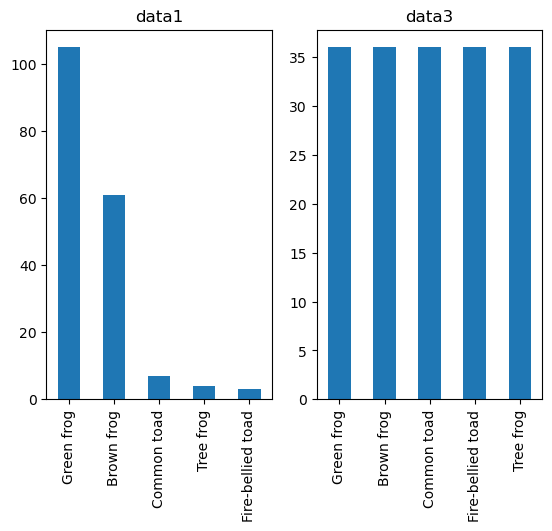

In [47]:
data3 = pd.read_csv("amphibians3.csv")

plt.subplot(1,2,1)
plt.subplot(1,2,2).set_title('data3')
data3.iloc[:, -1].value_counts().plot(kind='bar')

plt.subplot(1,2,1).set_title('data1')
data1.iloc[:, -1].value_counts().plot(kind='bar')



The instances in `data3` have been tailored to have an even distribution of class labels. It looks like this was done by capping the number of instances included for 'Green frog' and 'Brown frog' (the most common class labels) at 36, and then duplicating instances with the minority class labels until they also have 36 instances each. 

These changes were likely made to eliminate bias stemming from the imbalance of class distribution in the original data set. 'Green frog' followed by 'Brown frog' made up the majority of instances, which would result in these class labels being predicted more often. For KNN models there is a higher chance neighbours will be from these classes simply due to their prevalence in the dataset, and the sparsity of the minority classes. 

However, the method of duplicating minority class instances could have adverse effects if the attribute values are not representative of those class labels. This could lead models to finding a strong relationship between these attribute values and the class since they are repeated many times in the dataset, when in reality they were just duplicated to even the class distribution. Futhermore, if the imbalance of class labels displayed in `data1` is representative of real-life, then results using the balanced distribution must still be compared against this baseline.

**Q4.2** Use the same encoding technique as used in Q1.1 to encode the `data3` dataset and apply the same normalization technique as used in Q2.1 to normalise the data. For 10 rounds, split the encoded and normalized data3 into 70% training and 30% testing sets,  set the `random_state` equal to the loop counter. Train and test the following models using `data3`: **[1 mark]**
- Zero-R
- K-Nearest Neighbour (K = 1, 5 and 20) 

Calculate the average accuracy of the models for 10 runs and report the results.


In [48]:
y3 = data3.iloc[:, -1]
X3 = data3.iloc[:, :-1]

In [49]:
ZeroR_Acc_3 = []
KNN1_Acc_3 = []
KNN5_Acc_3 = []
KNN20_Acc_3 = []

KNN1_Acc_3_on_1 = []
KNN5_Acc_3_on_1 = []
KNN20_Acc_3_on_1 = []

# your code here
X3_enc_norm = normalise(encode(X3))

# drop attribute values not represented in data3 to compare with data1
X1_compare = X1_enc_norm.drop(columns=['SUR2-11', 'SUR3-5', 'MR-1', 'TR-7'])
# X1_enc_norm.info()
# X1_compare.info()
# X3_enc_norm.info()
# print(X3_enc_norm.head())
# print(X1_enc_norm.head())

for i in range(10):
    X3_enc_norm_train, X3_enc_norm_test, y3_train, y3_test = train_test_split(X3_enc_norm, y3, test_size=0.3, random_state=i)
    # for testing against imbalanced class data
    X1_compare_train, X1_compare_test, y1_train, y1_test = train_test_split(X1_compare, y1, test_size=0.3, random_state=i)
    
    ZeroR.fit(X3_enc_norm_train, y3_train)
    ZeroR_Acc_3.append(ZeroR.score(X3_enc_norm_test, y3_test))
    
    KNN1.fit(X3_enc_norm_train, y3_train)
    KNN1_Acc_3.append(KNN1.score(X3_enc_norm_test, y3_test))
    KNN1_Acc_3_on_1.append(KNN1.score(X1_compare_test, y1_test))
    
    KNN5.fit(X3_enc_norm_train, y3_train)
    KNN5_Acc_3.append(KNN5.score(X3_enc_norm_test, y3_test))
    KNN5_Acc_3_on_1.append(KNN5.score(X1_compare_test, y1_test))
    
    KNN20.fit(X3_enc_norm_train, y3_train)
    KNN20_Acc_3.append(KNN20.score(X3_enc_norm_test, y3_test))
    KNN20_Acc_3_on_1.append(KNN20.score(X1_compare_test, y1_test))
    
#     if (i == 9):
#         print("\n\n ===========\n ZeroR FULL RESULTS\n===========")
#         ZeroR_predictions = ZeroR.predict(X3_enc_norm_test)
#         print(classification_report(y3_test, ZeroR_predictions, zero_division=0))
        
#         print("\n\n ===========\n KNN1 FULL RESULTS\n===========")
#         KNN1_predictions = KNN1.predict(X3_enc_norm_test)
#         print(classification_report(y3_test, KNN1_predictions, zero_division=0))
        
#         print("\n\n ===========\n KNN1 DATA3->1 RESULTS\n===========")
#         KNN1_predictions = KNN1.predict(X1_compare_test)
#         print(classification_report(y1_test, KNN1_predictions, zero_division=0))
        
#         print("\n\n ===========\n KNN5 FULL RESULTS\n===========")
#         KNN5_predictions = KNN5.predict(X3_enc_norm_test)
#         print(classification_report(y3_test, KNN5_predictions, zero_division=0))
        
#         print("\n\n ===========\n KNN5 DATA3->1 RESULTS\n===========")
#         KNN5_predictions = KNN5.predict(X1_compare_test)
#         print(classification_report(y1_test, KNN5_predictions, zero_division=0))
        
#         print("\n\n ===========\n KNN20 FULL RESULTS\n===========")
#         KNN20_predictions = KNN20.predict(X3_enc_norm_test)
#         print(classification_report(y3_test, KNN20_predictions, zero_division=0))
        
#         print("\n\n ===========\n KNN5 DATA3->1 RESULTS\n===========")
#         KNN20_predictions = KNN20.predict(X1_compare_test)
#         print(classification_report(y1_test, KNN20_predictions, zero_division=0))
        
        
print("Accuracy of ZeroR: \tdata1:", np.mean(ZeroR_Acc_1).round(2),"\tdata3:",np.mean(ZeroR_Acc_3).round(2))
print("Accuracy of KNN(1): \tdata1:", np.mean(KNN1_Acc_2).round(2),"\tdata3:", np.mean(KNN1_Acc_3).round(2),"\td3->1:",np.mean(KNN1_Acc_3_on_1).round(2))
print("Accuracy of KNN(5): \tdata1:", np.mean(KNN5_Acc_2).round(2),"\tdata3:", np.mean(KNN5_Acc_3).round(2),"\td3->1:",np.mean(KNN5_Acc_3_on_1).round(2))
print("Accuracy of KNN(20): \tdata1:", np.mean(KNN20_Acc_2).round(2),"\tdata3:", np.mean(KNN20_Acc_3).round(2),"\td3->1:",np.mean(KNN20_Acc_3_on_1).round(2))

Accuracy of ZeroR: 	data1: 0.59 	data3: 0.14
Accuracy of KNN(1): 	data1: 0.54 	data3: 0.76 	d3->1: 0.64
Accuracy of KNN(5): 	data1: 0.57 	data3: 0.65 	d3->1: 0.37
Accuracy of KNN(20): 	data1: 0.64 	data3: 0.44 	d3->1: 0.19


**Q4.3** Discuss any differences you observe between the results of these KNN classifiers on data1 (Q2.2) and data3. **[2 marks]** </br>*NOTE:  You may need to compare other performance metrics of these models, such as precision and recall of each class label, to gain a better understanding of their performance. You can use the `classification_report` from `sklearn.metrics` for this matter and check the performance of the classifiers for one round.* 

After balancing the distribution of class labels we can see an increase in accuracy for the KNN(1) and KNN(5) models, but a decrease in accuracy for the KNN(20) model. ZeroR suffers as well since any chosen class now only makes up exactly 1/6 of the dataset. If the even distribution of classes is not representative of the real-life distribution of newts, then this baseline is not useful.

All of the models improved in their recall for the previously minority classes due to the increased instances of these (duplicated). The KNN(1) in particular performs much better in all of precision, recall, and accuracy. However, both this and the KNN(5) model are likely overfitted to the data in this case, particularly to the duplicated minority class instances. These duplicated, identical instances are likely to appear in both the train and test sets, inflating the performance measures for these trivial predictions. Additionally, the KNN(5) suffers in precision and recall for predictions of the previously highly represented classes.

We can test this hypothesis by inputting test data from the unbalanced (real-life) data in `amphibians1.csv` to the KNN models built from `amphibians3.csv` (after dropping additional attribute value columns from `data1`). 
<br>The result is a large drop in overall accuracy for the KNN(5) and KNN(20) models, and a smaller drop for KNN(1). All of the models show improved recall for the (once again) minority classes as they already contain duplicates of these instances, so they can easily identify them. However, now that the class imbalance is reintroduced, these minority classes are over-predicted (low precision), and the highly represented classes of 'Green frog' and 'Brown frog' suffer low recall.

The KNN(20) model likely suffers in overall accuracy here from over-generalisation. Since there is no distance weighting used in these models, the relatively high 20 neighbours now likely includes a variety of classes that confuses the prediction. If one of the duplicated minority class instances is close to the test instance, then (due to the duplicates) that class may dominate the majority ruling. When applied to test data from `amphibians1.csv` the model suffers particularly badly due to the class imbalance reintroduced, as the `data3` model doesn't generalise as broadly for the majority classes.

# Authorship Declaration:

   (1) I certify that the program contained in this submission is completely
   my own individual work, except where explicitly noted by comments that
   provide details otherwise.  I understand that work that has been developed
   by another student, or by me in collaboration with other students,
   or by non-students as a result of request, solicitation, or payment,
   may not be submitted for assessment in this subject.  I understand that
   submitting for assessment work developed by or in collaboration with
   other students or non-students constitutes Academic Misconduct, and
   may be penalized by mark deductions, or by other penalties determined
   via the University of Melbourne Academic Honesty Policy, as described
   at https://academicintegrity.unimelb.edu.au.

   (2) I also certify that I have not provided a copy of this work in either
   softcopy or hardcopy or any other form to any other student, and nor will
   I do so until after the marks are released. I understand that providing
   my work to other students, regardless of my intention or any undertakings
   made to me by that other student, is also Academic Misconduct.

   (3) I further understand that providing a copy of the assignment
   specification to any form of code authoring or assignment tutoring
   service, or drawing the attention of others to such services and code
   that may have been made available via such a service, may be regarded
   as Student General Misconduct (interfering with the teaching activities
   of the University and/or inciting others to commit Academic Misconduct).
   I understand that an allegation of Student General Misconduct may arise
   regardless of whether or not I personally make use of such solutions
   or sought benefit from such actions.

   <b>Signed by</b>: Hugo Akindele-Obe (1444970)
   
   <b>Dated</b>: 10/04/2023